In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Problema 1:
Desarrolle una funcion la cual reciba dos parametros, una imagen y un entero llamado color, la
funcion debe devolver una imagen la cual tenga activos los canales de color segun los siguientes
puntos

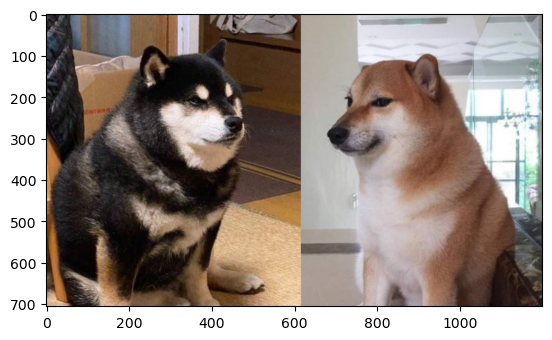

In [2]:
# SE CARGA Y SE VERIFICA QUE LA IMAGEN ORIGINAL NO TENGA PROBLEMAS PARA MOSTRARSE

img2=cv2.imread("cheems.jpg")
img2=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.show()

In [3]:
# FUNCION QUE ACTIVA SEGUN COLORES SOLICITADOS

def activacionColores(img,color):

# Descripcion: Esta funcion genera la imagen que incluye unicamente los colores especificados (colores por activar)
# Entradas: entero(indica opcion de color), matriz de pixels que representan la imagen 
# Salida: imagen con los colores especificados
    alto=img.shape[0]
    ancho=img.shape[1]
    monocromo=np.zeros((alto,ancho,3))

    for i in range(0,alto):
        for j in range(0,ancho):
            # se extrae pixel de la matriz
            pixel=img[i,j]
            #se extrae el canal del pixel, pues un pixel es un arreglo con 3 valores (representan color RGB)
            blue=pixel[0]
            green=pixel[1]
            red=pixel[2]
            #Se evalua que combinacion de colores se debe activar
            if color == 1:
                monocromo[i,j]=[blue,0,0]
                imgName="monocromoBlue.jpg"
            elif color == 2:
                monocromo[i,j]=[0,green,0]
                imgName="monocromoGreen.jpg"
            elif color == 3:
                monocromo[i,j]=[0,0,red]
                imgName="monocromoRed.jpg"
            elif color == 10:
                monocromo[i,j]=[0,green,red]
                imgName="monocromoRedgreen.jpg"
            elif color == 20:
                monocromo[i,j]=[blue,green,0]
                imgName="monocromoGreenblue.jpg"
            elif color == 30:
                monocromo[i,j]=[blue,0,red]
                imgName="monocromoRedblue.jpg"
    
    return cv2.imwrite(imgName,monocromo)
                      

In [4]:
# SE LLAMA FUNCION CON LA IMAGEN Y CADA UNA DE LAS OPCIONES PARA GENERAR IMAGENES DE COLORES ESPECIFICADOS
activacionColores(img2,10)

True

### Problema 2
En el .zip del laboratorio se le compartio un conjunto de imagenes en escala de grises, estas imagenes
fueron creadas utilizando una escala de grises en 3D, cree una funcion que dadas las 3 imagenes se
construya la imagen original a color.

In [5]:

def ImagenColor(rojo,verde,azul):
# Descripcion: Esta funcion genera la imagen como resultado de la combinacion de las imagenes en gris
# Entradas: imagenes en gris de cada canal
# Salida: imagen a color
        
        #Se verifica que todas las imagenes tengan las mismas dimensiones
        if azul.shape != verde.shape or azul.shape != rojo.shape:
                raise ValueError("Las imágenes deben tener las mismas dimensiones.")

        # Se crea matriz vacia en donde se guardaran los valores de los pixel
        alto=rojo.shape[0]
        ancho=rojo.shape[1]
        imgColor=np.zeros((alto,ancho,3))

        imgColor[:, :, 0] = azul[:, :,0]
        imgColor[:, :, 1] = verde[:, :,0]
        imgColor[:, :, 2] = rojo[:, :,0]

        return imgColor

In [6]:
#PROBANDO FUNCION PARA CARPETA IMAGEN1
azul1=cv2.imread("imagen1/imagen1_salida_gray_azul.jpg")
verde1=cv2.imread("imagen1/imagen1_salida_gray_verde.jpg")
rojo1=cv2.imread("imagen1/imagen1_salida_gray_rojo.jpg")
img1=ImagenColor(rojo1,verde1,azul1)
cv2.imwrite("imagen1/imagen1_color.jpg",img1)

True

In [7]:
#PROBANDO FUNCION PARA CARPETA IMAGEN2
azul1=cv2.imread("imagen2/imagen2_salida_gray_azul.jpg")
verde1=cv2.imread("imagen2/imagen2_salida_gray_verde.jpg")
rojo1=cv2.imread("imagen2/imagen2_salida_gray_rojo.jpg")
img1=ImagenColor(rojo1,verde1,azul1)
cv2.imwrite("imagen2/imagen2_color.jpg",img1)

True

In [8]:
#PROBANDO FUNCION PARA CARPETA IMAGEN2
azul1=cv2.imread("imagen3/perro_salida_gray_azul.jpg")
verde1=cv2.imread("imagen3/perro_salida_gray_verde.jpg")
rojo1=cv2.imread("imagen3/perro_salida_gray_rojo.jpg")
img1=ImagenColor(rojo1,verde1,azul1)
cv2.imwrite("imagen3/perro_color.jpg",img1)

True

### Problema 3:
Cree una funcion que dada una imagen cree una escala de grises en tres dimensiones, tome en
cuenta que su funcion debe crear 3 imagenes como salida. Para entregar este ejercicio debe incluir
una las imagenes que haya utilizado como prueba y el resultado de las misma, no puede utilizar la
imagen del Problema #2.

In [9]:
def ImagenColor(imgColor):
# Descripcion: Esta funcion genera la imagen en escala gris para cada canal en base a la original de color
# Entradas: imagen a color
# Salida: imagenes en gris

        # Dividir los canales de la imagen
        azul_gris= imgColor[:, :, 0] 
        verde_gris= imgColor[:, :, 1] 
        rojo_gris= imgColor[:, :, 2] 

        return [azul_gris, verde_gris, rojo_gris]

In [10]:
#COMPROBANDO FUNCION CON IMAGEN DE EJERCICIO 1
colorOriginal=cv2.imread("cheems.jpg")
gris=ImagenColor(colorOriginal)
cv2.imwrite("cheems-gris-azul.jpg",gris[0])
cv2.imwrite("cheems-gris-verde.jpg",gris[1])
cv2.imwrite("cheems-gris-rojo.jpg",gris[2])

True

### Problema 4:
Cree una funcion que dada una imagen, muestre el histograma de cada canal de color y el de
escala de grises (utilice un promedio aritmetico para su escala de grises, no puede usar funciones
de opencv), sus histogramas deben incluir una lınea vertical la cual muestre el valor de la media
de la distribucion.

In [17]:
#FUNCION PARA CALCULAR ESCALA DE GRISES POR PROMEDIO

def escalaGris(img):

# Descripcion: Esta funcion genera imagen con escala de grises en base al promedio de cada pixel
# Entradas: imagen a color (matriz)
# Salida: imagen en gris (matriz)

    ancho = len(img[0])
    alto = len(img[1])
    matriz=np.zeros((alto,ancho,3))
    for i in range(alto):
        for j in range(ancho):
            pixel = img[i,j]
            # El doble / es para dividir y redondear a entero
            promedio = (pixel[0] + pixel[1] + pixel[2])//3
            matriz[:,:,0] = promedio
            matriz[:,:,1] = promedio
            matriz[:,:,2] = promedio
    return matriz

In [18]:
#FUNCION QUE GENERA HISTOGRAMAS CON LA LINEA DE SU PROMEDIO
def HistColores(img, colorind, canal):

# Descripcion: Esta funcion genera histograma por cada canal con linea de promedio
# Entradas: imagen a color (matriz), posicion del color del canal, canal(color, tambien dice el color de histograma)
# Salida: histogramas

    hist = cv2.calcHist([img], [colorind], None, [256], [0, 256])
    #Se calcula el promedio
    promedio = sum(i * hist[i] for i in range(256)) / sum(hist)
    #se grafica histogramas
    plt.plot(hist, color=canal)
    plt.axvline(promedio, color='black', linewidth=2)
    plt.xlim([0, 256])
    plt.title(f'Histograma - Canal {canal}')
    plt.xlabel('Intensidad de Píxeles')
    plt.ylabel('Frecuencia')
    plt.show()


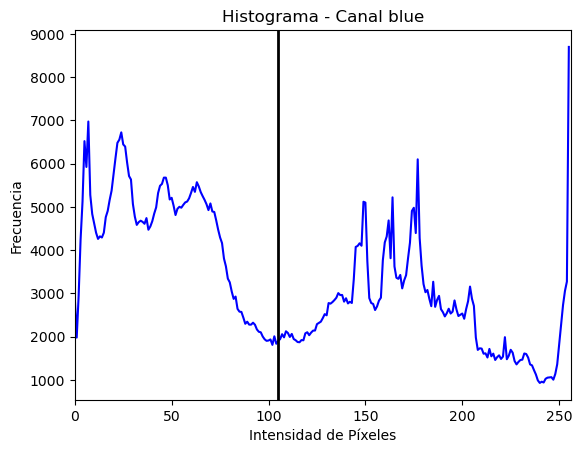

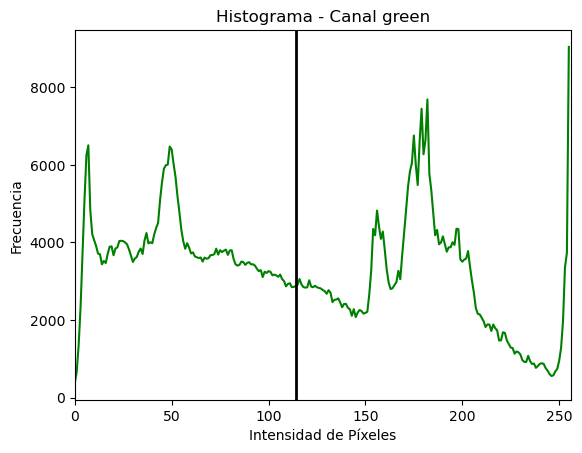

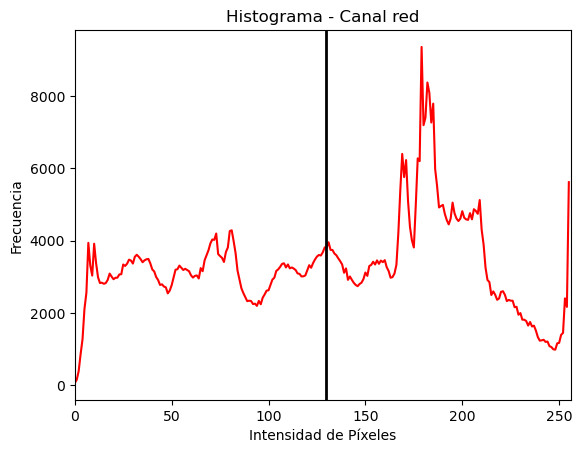

In [20]:
# Cargar una imagen a color
imgBase = cv2.imread("cheems.jpg")

# Dividir la imagen en sus canales individuales
azul, verde, rojo = cv2.split(imgBase)

# Graficar los histogramas por canal de color
HistColores(imgBase, 0, 'blue')
HistColores(imgBase, 1, 'green')
HistColores(imgBase, 2, 'red')